In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("LochanaAbeywickrama/phishing")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash', 'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation', 'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag', 'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
        num_rows: 75057
    })
    validation: Dataset({
        features: ['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash', 'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation', 'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag', 'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
        num_rows: 25020
    })
})


In [ ]:
# Access the validation split
validation_data = ds['validation']

# Convert to a Pandas DataFrame
validation_df = validation_data.to_pandas()
print(validation_df.head())
print(validation_df.info())
print(validation_df.isnull().sum())
validation_df.dropna(inplace=True)

   url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0          12       1         0            0        1               0   
1          22       2         0            0        0               0   
2          21       2         2            0        0               0   
3         163       4         2            0        9               0   
4         268       5         3            4        7               0   

   n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  n_plus  \
0        0     0      0              0        0        0        0       0   
1        0     0      0              0        0        0        0       0   
2        0     0      0              0        0        0        0       0   
3        7     0      6              0        0        0        0       0   
4        6     0      5              1        0        0        0       0   

   n_asterisk  n_hastag  n_dollar  n_percent  n_redirection  phishing  
0           0         0   

In [ ]:
# Access the train split
train_data = ds['train']

df = train_data.to_pandas()
print(df.head())
print(df.info())

print(df.isnull().sum())
df.dropna(inplace=True)

   url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0          37       3         0            0        0               0   
1          77       1         0            0        0               0   
2         126       4         1            2        0               1   
3          18       2         0            0        0               0   
4          55       2         2            0        0               0   

   n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  n_plus  \
0        0     0      0              0        0        0        0       0   
1        0     0      0              0        0        0        0       0   
2        3     0      2              0        0        0        0       0   
3        0     0      0              0        0        0        0       0   
4        0     0      0              0        0        0        0       0   

   n_asterisk  n_hastag  n_dollar  n_percent  n_redirection  phishing  
0           0         0   

Converting the train and validation dataset into respective X(features) and y(target)

In [ ]:
X_train = df.drop(columns=["phishing"])  # Features
y_train = df["phishing"]                # Target


In [ ]:
X_val = validation_df.drop(columns=["phishing"])  # Features
y_val = validation_df["phishing"]                # Target


Checking whether the dataset is imbalanced or not

In [ ]:
# Check the class distribution in the training set
print("Training Set Class Distribution:")
print(y_train.value_counts())

# Check the class distribution in the validation set
print("Validation Set Class Distribution:")
print(y_val.value_counts())

# To display proportions as percentages
print("\nTraining Set Class Proportions:")
print(y_train.value_counts(normalize=True) * 100)

print("\nValidation Set Class Proportions:")
print(y_val.value_counts(normalize=True) * 100)


Training Set Class Distribution:
phishing
0    47419
1    27638
Name: count, dtype: int64
Validation Set Class Distribution:
phishing
0    16296
1     8724
Name: count, dtype: int64

Training Set Class Proportions:
phishing
0    63.177319
1    36.822681
Name: proportion, dtype: float64

Validation Set Class Proportions:
phishing
0    65.131894
1    34.868106
Name: proportion, dtype: float64


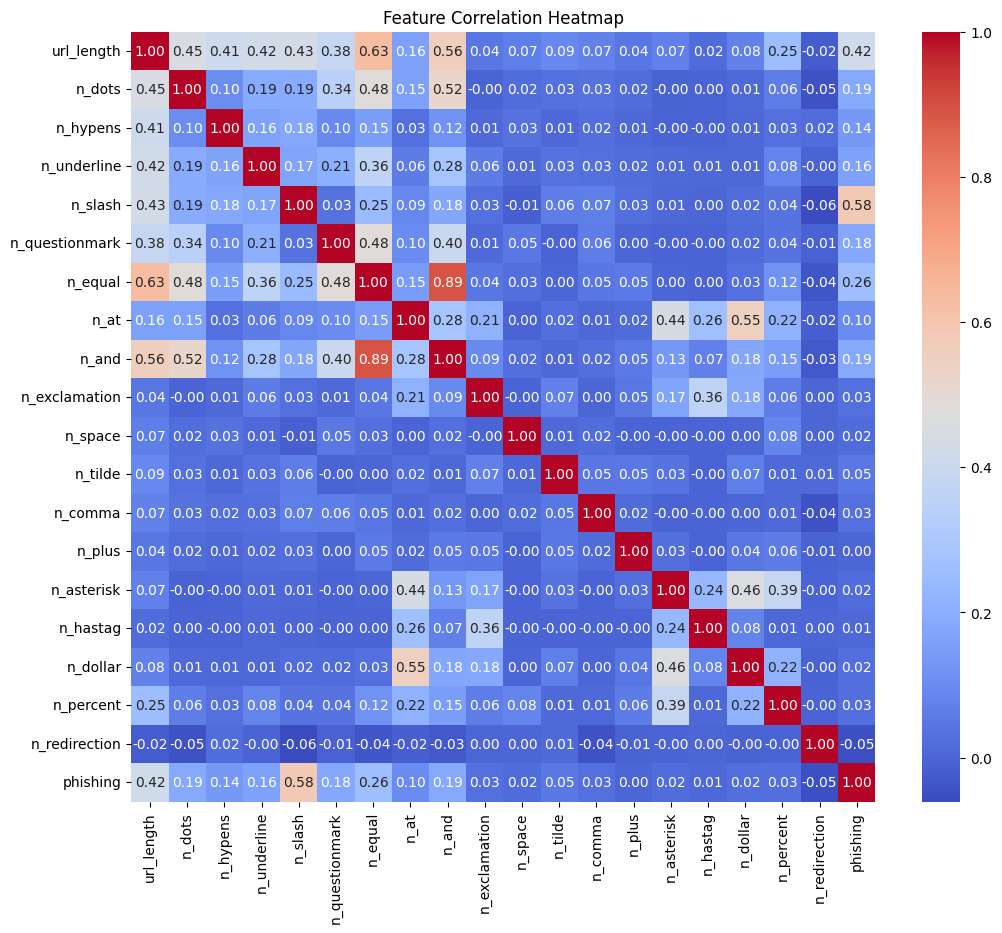

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


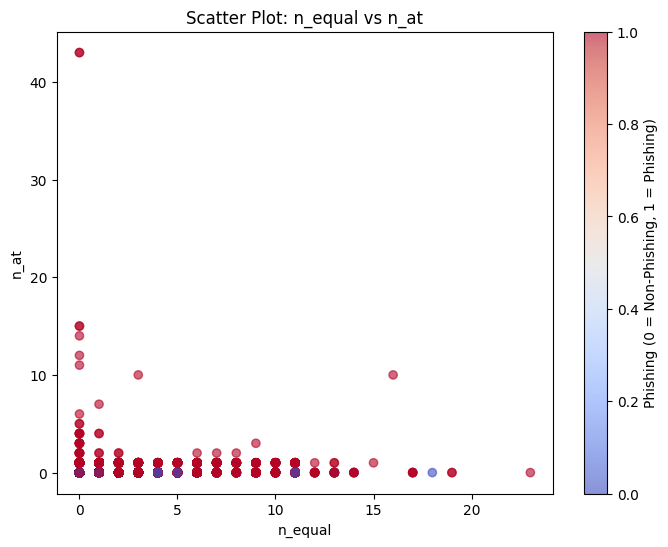

In [ ]:
import matplotlib.pyplot as plt

# Example scatter plot: url_length vs n_equal
plt.figure(figsize=(8, 6))
plt.scatter(df["n_equal"], df["n_at"], c=df["phishing"], cmap="coolwarm", alpha=0.6)
plt.xlabel("n_equal")
plt.ylabel("n_at")
plt.title("Scatter Plot: n_equal vs n_at")
plt.colorbar(label="Phishing (0 = Non-Phishing, 1 = Phishing)")
plt.show()


It is non linearly separable so linear models like Logistic Regression or Linear SVM wont work well

Train the model (no need for scaling the feature matrix because it is scale invariant )

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the Features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Train a Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', random_state=42)  # 'liblinear' works well for binary classification
log_reg.fit(X_train_scaled, y_train)

# Step 3: Make Predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_val_pred = log_reg.predict(X_val_scaled)

# Step 4: Evaluate the Model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Detailed Classification Report
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix
print("\nConfusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_val_pred))

# Optional: Print Feature Importance
print("\nFeature Coefficients:")
for feature, coef in zip(X_train.columns, log_reg.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Training Accuracy: 0.8507134577720932
Validation Accuracy: 0.8812949640287769

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16296
           1       0.88      0.77      0.82      8724

    accuracy                           0.88     25020
   macro avg       0.88      0.85      0.87     25020
weighted avg       0.88      0.88      0.88     25020


Confusion Matrix (Validation Set):
[[15357   939]
 [ 2031  6693]]

Feature Coefficients:
url_length: 3.6591
n_dots: -0.5238
n_hypens: -0.7969
n_underline: -0.4584
n_slash: 1.7510
n_questionmark: 0.1554
n_equal: 0.0527
n_at: 1.4358
n_and: -0.5811
n_exclamation: -0.0500
n_space: -0.0635
n_tilde: 0.0343
n_comma: -0.0877
n_plus: -0.1025
n_asterisk: 1.2704
n_hastag: 0.0057
n_dollar: 0.4505
n_percent: -0.5451
n_redirection: -0.0664


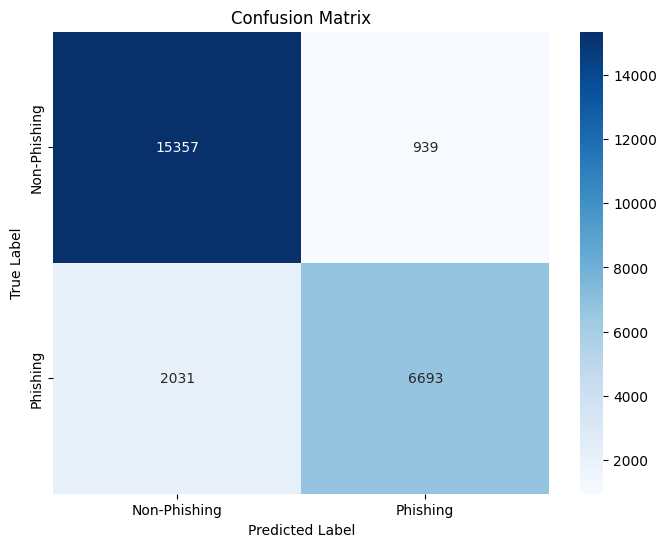

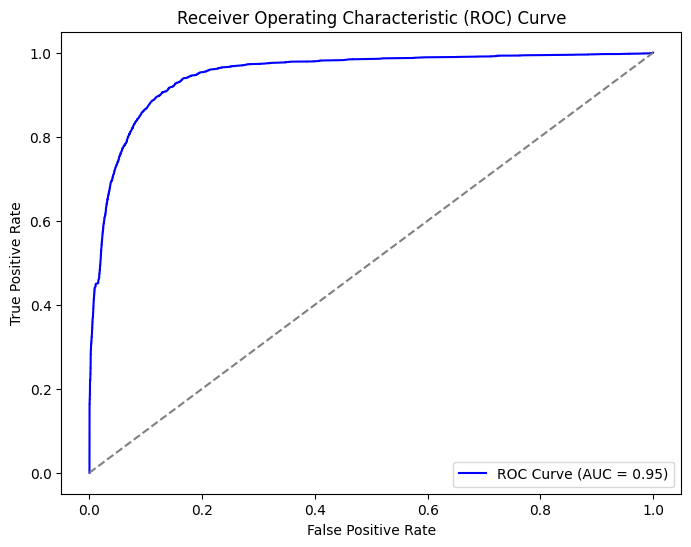

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

# Step 1: Calculate Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Step 2: Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, log_reg.predict_proba(X_val_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16296
           1       0.88      0.77      0.82      8724

    accuracy                           0.88     25020
   macro avg       0.88      0.86      0.87     25020
weighted avg       0.88      0.88      0.88     25020

Confusion Matrix (Validation Set):
[[15359   937]
 [ 2028  6696]]


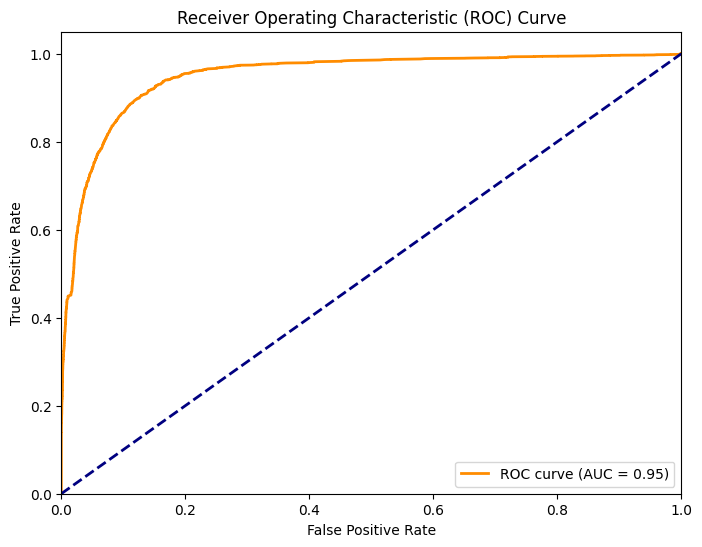

AUC of the best model: 0.95


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Step 1: Standardize the Features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms
    'penalty': ['l1', 'l2']  # Type of regularization
}

# Step 3: Perform GridSearchCV to find the best hyperparameters
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Ensure enough iterations for convergence
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)  # Fit grid search on the scaled training data

# Step 4: Get the best model from grid search
best_model = grid_search.best_estimator_

# Print best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Step 5: Make predictions using the best model
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)

# Step 6: Classification Report and Confusion Matrix (Validation Set)
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix (Validation Set):")
print(confusion_matrix(y_val, y_val_pred))

# Step 7: Predict probabilities on the validation set for ROC curve
y_prob = best_model.predict_proba(X_val_scaled)[:, 1]  # Get probabilities for the positive class

# Step 8: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)  # y_val is your validation labels
roc_auc = auc(fpr, tpr)

# Step 9: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC score
print(f"AUC of the best model: {roc_auc:.2f}")


In [ ]:
# Step 6: Classification Report and Confusion Matrix (Validation Set)
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix (Validation Set):")
cm = confusion_matrix(y_val, y_val_pred)
print(cm)

# Step 10: Plot the Confusion Matrix
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'], cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


MODEL 2 : RANDOM FOREST

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Predict probabilities for ROC-AUC calculation
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]  # Probabilities for the 'phishing' class


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred))


Confusion Matrix:
[[15217  1079]
 [ 1149  7575]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     16296
           1       0.88      0.87      0.87      8724

    accuracy                           0.91     25020
   macro avg       0.90      0.90      0.90     25020
weighted avg       0.91      0.91      0.91     25020



ROC-AUC Score: 0.9670949875717384


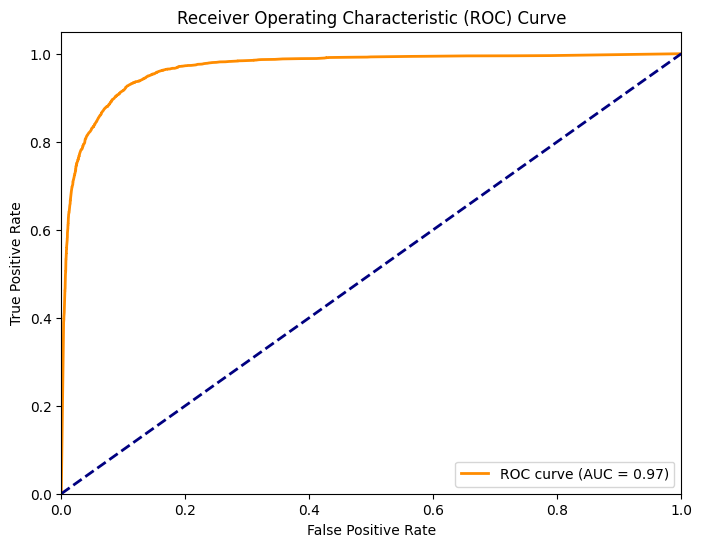

AUC of the Random Forest model: 0.97


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_val)

# Predict probabilities for ROC-AUC calculation
y_pred_proba = rf_model.predict_proba(X_val)[:, 1]  # Probabilities for the 'phishing' class

# Compute ROC-AUC
roc_auc = roc_auc_score(y_val, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output AUC score
print(f"AUC of the Random Forest model: {roc_auc:.2f}")


Model 3: Linear SVC

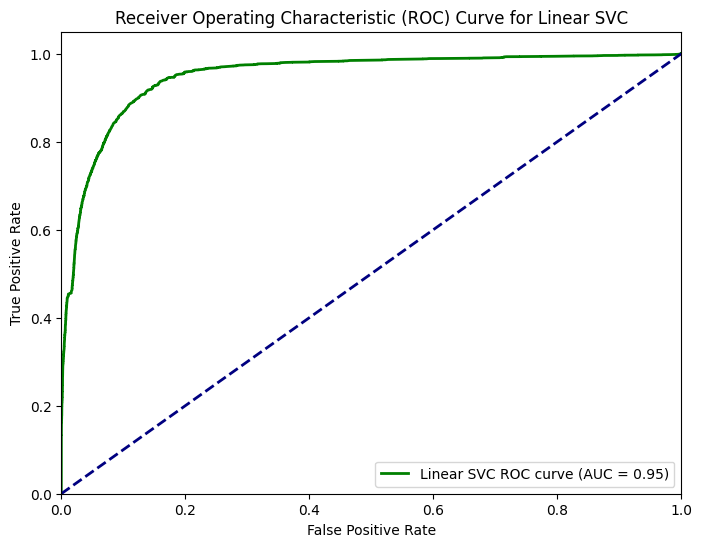

AUC of the Linear SVC model: 0.95


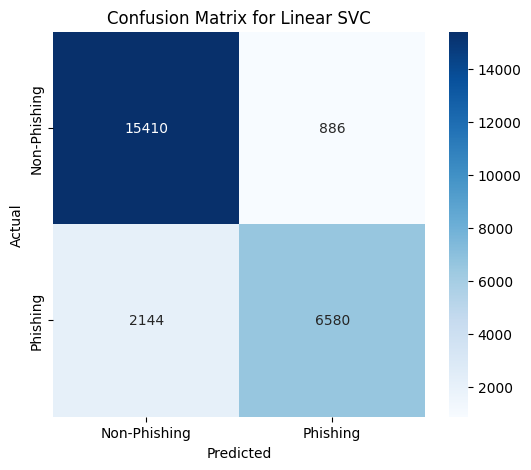

Classification Report for Linear SVC:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     16296
           1       0.88      0.75      0.81      8724

    accuracy                           0.88     25020
   macro avg       0.88      0.85      0.86     25020
weighted avg       0.88      0.88      0.88     25020

Accuracy of the Linear SVC model: 0.88


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Initialize and train the Linear SVC model
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions using the trained model
svc_pred = svc_model.predict(X_val_scaled)

# Step 4: Compute ROC-AUC for Linear SVC
svc_pred_proba = svc_model.decision_function(X_val_scaled)  # Decision function for SVC, used for ROC-AUC
svc_roc_auc = roc_auc_score(y_val, svc_pred_proba)

# Step 5: Compute ROC curve for Linear SVC
svc_fpr, svc_tpr, _ = roc_curve(y_val, svc_pred_proba)

# Step 6: Plot ROC Curve for Linear SVC
plt.figure(figsize=(8, 6))
plt.plot(svc_fpr, svc_tpr, color='green', lw=2, label=f'Linear SVC ROC curve (AUC = {svc_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Linear SVC')
plt.legend(loc='lower right')
plt.show()

# Step 7: Output AUC score for Linear SVC
print(f"AUC of the Linear SVC model: {svc_roc_auc:.2f}")

# Step 8: Compute Confusion Matrix for Linear SVC
cm = confusion_matrix(y_val, svc_pred)

# Step 9: Plot Confusion Matrix for Linear SVC
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear SVC')
plt.show()

# Step 10: Output Classification Report for Linear SVC
print("Classification Report for Linear SVC:")
print(classification_report(y_val, svc_pred))

# Step 11: Print Accuracy for Linear SVC
accuracy = accuracy_score(y_val, svc_pred)
print(f"Accuracy of the Linear SVC model: {accuracy:.2f}")


Model 4 : Naive Bayes

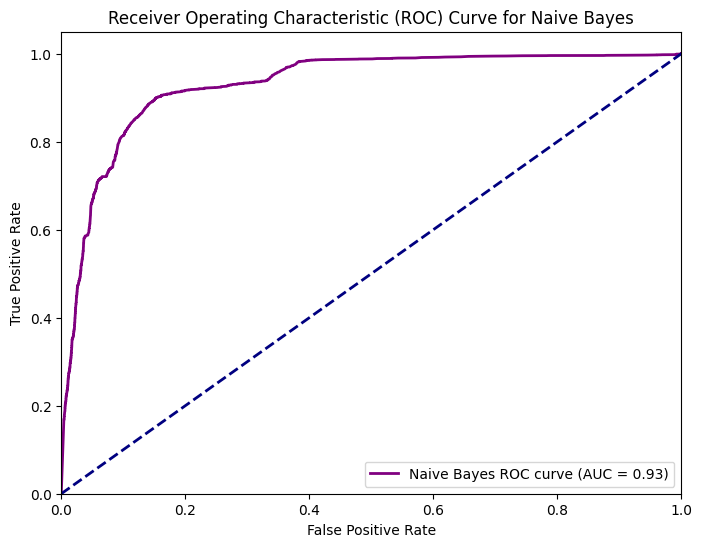

AUC of the Naive Bayes model: 0.93


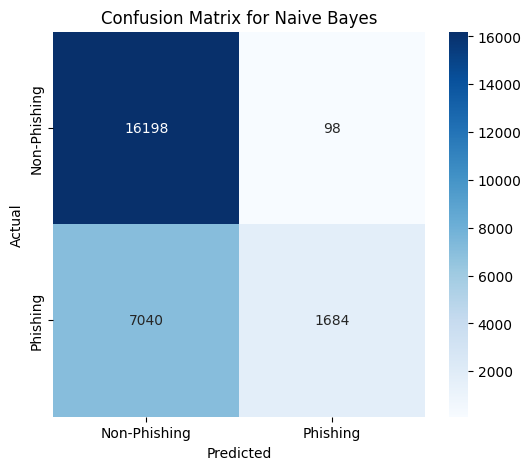

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82     16296
           1       0.95      0.19      0.32      8724

    accuracy                           0.71     25020
   macro avg       0.82      0.59      0.57     25020
weighted avg       0.78      0.71      0.65     25020

Accuracy of the Naive Bayes model: 0.71


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the data for Naive Bayes (although Naive Bayes doesn't require scaling, it can help improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions using the trained model
nb_pred = nb_model.predict(X_val_scaled)

# Step 4: Compute ROC-AUC for Naive Bayes
nb_pred_proba = nb_model.predict_proba(X_val_scaled)[:, 1]  # Probabilities for the 'phishing' class
nb_roc_auc = roc_auc_score(y_val, nb_pred_proba)

# Step 5: Compute ROC curve for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_val, nb_pred_proba)

# Step 6: Plot ROC Curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='purple', lw=2, label=f'Naive Bayes ROC curve (AUC = {nb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Step 7: Output AUC score for Naive Bayes
print(f"AUC of the Naive Bayes model: {nb_roc_auc:.2f}")

# Step 8: Compute Confusion Matrix for Naive Bayes
cm = confusion_matrix(y_val, nb_pred)

# Step 9: Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Step 10: Output Classification Report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_val, nb_pred))

# Step 11: Print Accuracy for Naive Bayes
accuracy = accuracy_score(y_val, nb_pred)
print(f"Accuracy of the Naive Bayes model: {accuracy:.2f}")


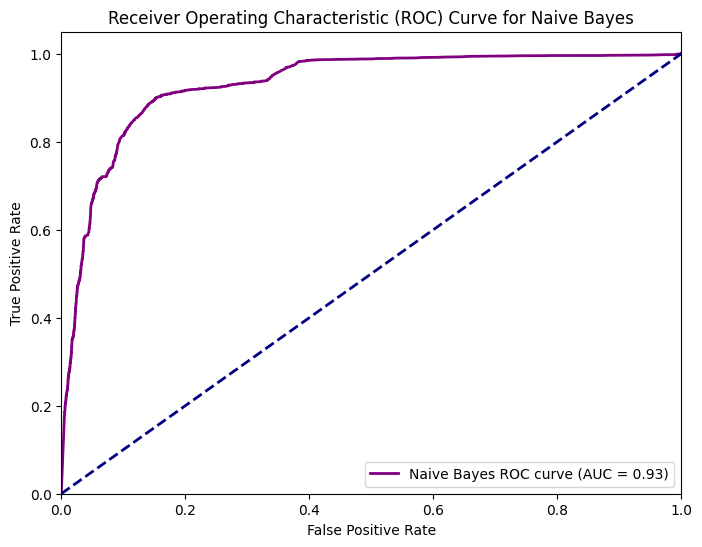

AUC of the Naive Bayes model: 0.93


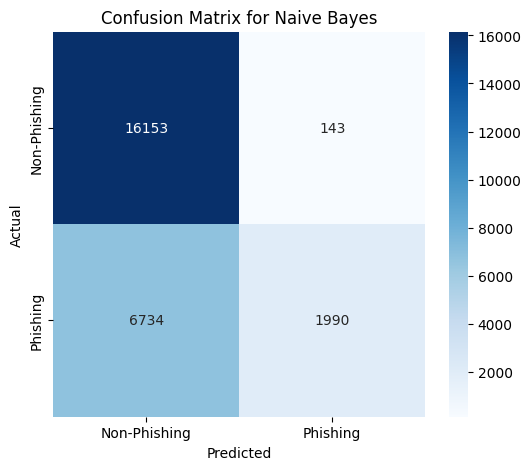

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.71      0.99      0.82     16296
           1       0.93      0.23      0.37      8724

    accuracy                           0.73     25020
   macro avg       0.82      0.61      0.60     25020
weighted avg       0.78      0.73      0.66     25020

Accuracy of the Naive Bayes model: 0.73


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Step 1: Scale the data for Naive Bayes (although Naive Bayes doesn't require scaling, it can help improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Hyperparameter tuning for Naive Bayes using GridSearchCV
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}  # Smoothing parameter tuning
nb_model = GaussianNB()
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train_scaled, y_train)

# Step 3: Best model after tuning
best_nb_model = grid_search.best_estimator_

# Step 4: Make predictions using the best model
nb_pred = best_nb_model.predict(X_val_scaled)

# Step 5: Compute ROC-AUC for Naive Bayes
nb_pred_proba = best_nb_model.predict_proba(X_val_scaled)[:, 1]  # Probabilities for the 'phishing' class
nb_roc_auc = roc_auc_score(y_val, nb_pred_proba)

# Step 6: Compute ROC curve for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_val, nb_pred_proba)

# Step 7: Plot ROC Curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='purple', lw=2, label=f'Naive Bayes ROC curve (AUC = {nb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Step 8: Output AUC score for Naive Bayes
print(f"AUC of the Naive Bayes model: {nb_roc_auc:.2f}")

# Step 9: Compute Confusion Matrix for Naive Bayes
cm = confusion_matrix(y_val, nb_pred)

# Step 10: Plot Confusion Matrix for Naive Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Phishing', 'Phishing'], yticklabels=['Non-Phishing', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Step 11: Output Classification Report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_val, nb_pred))

# Step 12: Print Accuracy for Naive Bayes
accuracy = accuracy_score(y_val, nb_pred)
print(f"Accuracy of the Naive Bayes model: {accuracy:.2f}")


Plotting the ROC AUC curve of all 4 models to compare which is the best model for this dataset

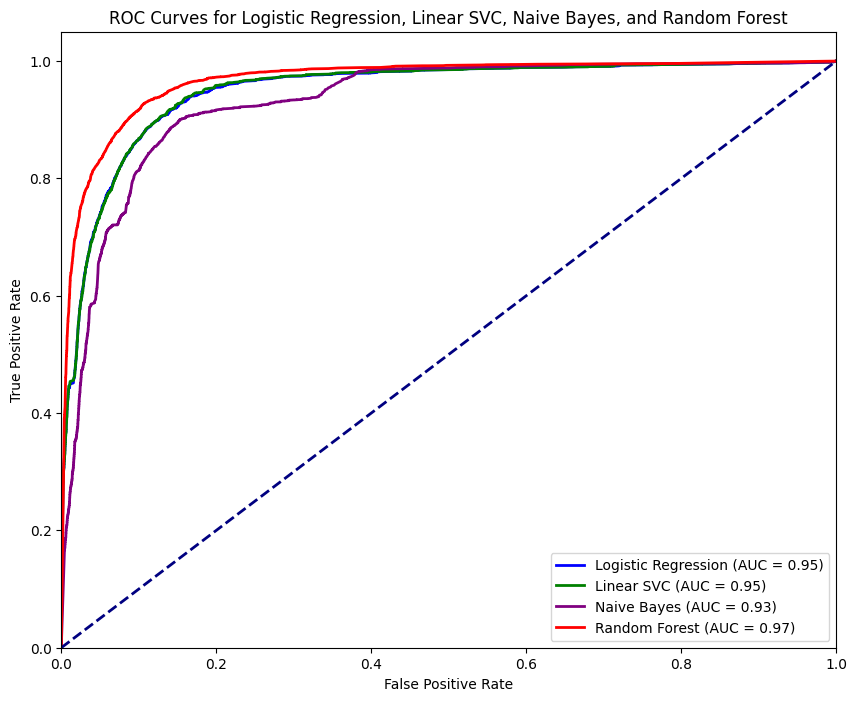

Logistic Regression AUC: 0.95
Linear SVC AUC: 0.95
Naive Bayes AUC: 0.93
Random Forest AUC: 0.97


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Scale the data (For models like Linear SVC, scaling can help improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Initialize the models with the best parameters
logreg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
svc_model = LinearSVC(random_state=42)
nb_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Fit all models on the training data
logreg_model.fit(X_train_scaled, y_train)
svc_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Step 4: Predict probabilities for each model
logreg_pred_proba = logreg_model.predict_proba(X_val_scaled)[:, 1]
svc_pred_proba = svc_model.decision_function(X_val_scaled)  # SVC outputs decision function values, so we use them directly for ROC
nb_pred_proba = nb_model.predict_proba(X_val_scaled)[:, 1]
rf_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]

# Step 5: Calculate ROC-AUC scores for each model
logreg_roc_auc = roc_auc_score(y_val, logreg_pred_proba)
svc_roc_auc = roc_auc_score(y_val, svc_pred_proba)
nb_roc_auc = roc_auc_score(y_val, nb_pred_proba)
rf_roc_auc = roc_auc_score(y_val, rf_pred_proba)

# Step 6: Compute ROC curves for each model
logreg_fpr, logreg_tpr, _ = roc_curve(y_val, logreg_pred_proba)
svc_fpr, svc_tpr, _ = roc_curve(y_val, svc_pred_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_val, nb_pred_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_pred_proba)

# Step 7: Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(logreg_fpr, logreg_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {logreg_roc_auc:.2f})')
plt.plot(svc_fpr, svc_tpr, color='green', lw=2, label=f'Linear SVC (AUC = {svc_roc_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, color='purple', lw=2, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, color='red', lw=2, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# Plot the diagonal line (no-skill classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Step 8: Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, Linear SVC, Naive Bayes, and Random Forest')
plt.legend(loc='lower right')
plt.show()

# Step 9: Print AUC scores for comparison
print(f"Logistic Regression AUC: {logreg_roc_auc:.2f}")
print(f"Linear SVC AUC: {svc_roc_auc:.2f}")
print(f"Naive Bayes AUC: {nb_roc_auc:.2f}")
print(f"Random Forest AUC: {rf_roc_auc:.2f}")


Random Forest works best for this dataset